In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import cv2

Let's see the original image

In [2]:
image = cv2.imread("self_driving_car.jpg")

cv2.imshow("self driving car", image)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
image.shape

(533, 800, 3)

Original image must be converted to gray scale image before processing

In [4]:
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2.imshow("gray self driving car", gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
gray_img.shape

(533, 800)

By converting into gray scale image, we have lost the 3rd dimension.

### Let's apply Sharpening Kernel

A useful link for different kernels: https://setosa.io/ev/image-kernels/

In [6]:
sharpen = np.array([[0,-1,0],
                        [-1,5,-1],
                         [0,-1,0]])

sharpen

array([[ 0, -1,  0],
       [-1,  5, -1],
       [ 0, -1,  0]])

In [7]:
sharpened_img = cv2.filter2D(gray_img, -1, sharpen)

cv2.imshow("sharpened self driving car", sharpened_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

-1 is the desired depth of the destination image.

when ddepth=-1, the output image will have the same depth as the source.

### Blurring Kernel

In [8]:
blurring_kernel = 1/16 * np.ones((3,3))
blurring_kernel

array([[0.0625, 0.0625, 0.0625],
       [0.0625, 0.0625, 0.0625],
       [0.0625, 0.0625, 0.0625]])

In [9]:
blurred_img = cv2.filter2D(gray_img, -1, blurring_kernel)

cv2.imshow("blurred self driving car", blurred_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

Here there is a wider kernel for blurring. Let's see how it is going to affect.

In [10]:
blurring_kernel2 = 1/16 * np.ones((5,5))
blurring_kernel2

array([[0.0625, 0.0625, 0.0625, 0.0625, 0.0625],
       [0.0625, 0.0625, 0.0625, 0.0625, 0.0625],
       [0.0625, 0.0625, 0.0625, 0.0625, 0.0625],
       [0.0625, 0.0625, 0.0625, 0.0625, 0.0625],
       [0.0625, 0.0625, 0.0625, 0.0625, 0.0625]])

In [11]:
blurred_img2 = cv2.filter2D(gray_img, -1, blurring_kernel2)

In [12]:
cv2.imshow("blurred self driving car", blurred_img)
cv2.imshow("(wider kernel is applied) self driving car", blurred_img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Sobel Filter

Sobel calculates the derivative of an image

In [13]:
sobel_x = np.array([[1,0,-1],
                   [2,0,-2],
                    [1,0,-1]])

sobel_y = np.array([[1,2,1],
                   [0,0,0],
                    [-1,-2,-1]])

print(sobel_x, end="\n\n")
print(sobel_y)

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


In [14]:
left_sobel_img = cv2.filter2D(gray_img, -1, sobel_x)
top_sobel_img = cv2.filter2D(gray_img, -1, sobel_y)

cv2.imshow("left sobel self driving car", left_sobel_img)
cv2.imshow("top sebol self driving car", top_sobel_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
sobel_right = -1 * sobel_x
sobel_bottom = -1 * sobel_y

sobel_right

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])

In [16]:
right_sobel_img = cv2.filter2D(gray_img, -1, sobel_right)
bottom_sobel_img = cv2.filter2D(gray_img, -1, sobel_bottom)

cv2.imshow("right sobel self driving car", right_sobel_img)
cv2.imshow("bottom sebol self driving car", bottom_sobel_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

Let's see the combinations of sobel kernels

In [17]:
sobel_image = left_sobel_img + right_sobel_img + top_sobel_img + bottom_sobel_img

cv2.imshow("combinations of all sobels", sobel_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

The Sobel filter is used for edge detection. It works by calculating the gradient of image intensity at each pixel within the image. It finds the direction of the largest increase from light to dark and the rate of change in that direction.

https://www.cs.auckland.ac.nz/courses/compsci373s1c/PatricesLectures/Edge%20detection-Sobel_2up.pdf

In [18]:
x_sobel = cv2.Sobel(gray_img, cv2.CV_64F, 0, 1, ksize = 7)

cv2.imshow('Sobel - X direction', x_sobel)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [19]:
y_sobel = cv2.Sobel(gray_img, cv2.CV_64F, 1, 0, ksize = 7)

cv2.imshow('Sobel - Y direction', y_sobel)

cv2.waitKey()
cv2.destroyAllWindows()

### Laplacian Filter

Unlike first-order filters that detect the edges based on local maxima or minima, Laplacian detects the edges at zero crossings i.e. where the value changes from negative to positive and vice-versa.

 - https://theailearner.com/tag/cv2-laplacian/

 - https://homepages.inf.ed.ac.uk/rbf/HIPR2/log.htm
 
 
 
laplacian kernel = [[0,1,0], [1,-4,1], [0,1,0]]

In [20]:
laplacian_img = cv2.Laplacian(gray_img, cv2.CV_64F)
cv2.imshow('Laplacian', laplacian_img)
cv2.waitKey()
cv2.destroyAllWindows()

### Canny Filter

In [21]:
image = cv2.imread("jet-engine-klm.jpg")

cv2.imshow("turbojet engine", image)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2.imshow("gray turbojet engine", gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [23]:
threshold_1 = 200
threshold_2 = 300

canny1 = cv2.Canny(gray_img, threshold_1, threshold_2)

cv2.imshow('Canny', canny1)
cv2.waitKey()
cv2.destroyAllWindows()

In [24]:
sharpened_engine = cv2.filter2D(gray_img, -1, sharpen)

cv2.imshow('Sharpen', sharpened_engine)
cv2.waitKey()
cv2.destroyAllWindows()

In [25]:
threshold_1 = 200
threshold_2 = 300

canny2 = cv2.Canny(sharpened_engine, threshold_1, threshold_2)

cv2.imshow('Canny', canny2)
cv2.waitKey()
cv2.destroyAllWindows()

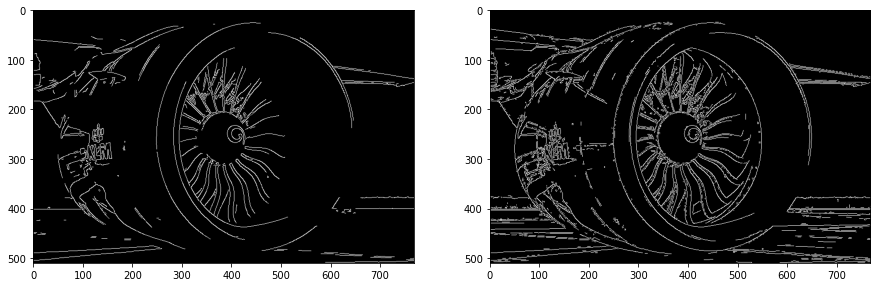

In [26]:
plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(canny1, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(canny2, cmap="gray")

#### I am going to apply mask to pull out front edge of the engine

In [27]:
canny2.shape

(510, 768)

In [28]:
height, width = canny2.shape

In [32]:
import math

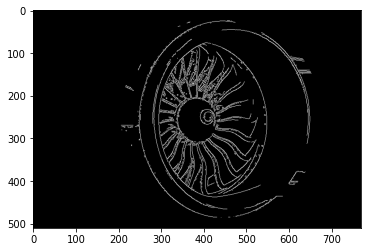

In [62]:
mask = np.zeros([height, width])
r = 235
center = (250, 440)
for i in range(height):
    for j in range(width):
        d = math.sqrt((center[0]-i)**2 + (center[1]-j)**2);
        if d > r:
            mask[i][j] = 0
        else:
            mask[i][j] = canny2[i][j]

plt.imshow(mask, cmap="gray")

#### Another Cv2 method for applying mask 